In [ ]:
%cd ..

In [2]:
import os
try:
    os.mkdir('./data/raw')
except:
    pass
try:
    os.mkdir('./data/raw/USPTO_original')
except:
    pass

In [3]:
# download the original USPTO datasets
!wget https://ndownloader.figshare.com/articles/5104873/versions/1
# move it to data/raw
!mv 1 data/raw

--2021-09-22 10:31:19--  https://ndownloader.figshare.com/articles/5104873/versions/1
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.16.102.173, 54.217.124.219, 2a05:d018:1f4:d000:b283:27aa:b939:8ed4, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.16.102.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494666791 (1.4G) [application/zip]
Saving to: ‘1’

1                   100%[===================>]   1.39G  60.0MB/s    in 25s     

2021-09-22 10:31:47 (56.3 MB/s) - ‘1’ saved [1494666791/1494666791]



In [4]:
# unzip the datasets
!unzip data/raw/1 -d data/raw

Archive:  data/raw/1
 extracting: data/raw/1976_Sep2016_USPTOgrants_cml.7z  
 extracting: data/raw/2001_Sep2016_USPTOapplications_cml.7z  
 extracting: data/raw/2001_Sep2016_USPTOapplications_smiles.7z  
 extracting: data/raw/1976_Sep2016_USPTOgrants_smiles.7z  
 extracting: data/raw/cml_xsd.zip    


In [5]:
# remove the original file
!rm data/raw/1

In [6]:
!pip install pyunpack

In [7]:
!pip install patool

In [8]:
from pyunpack import Archive
Archive('data/raw/1976_Sep2016_USPTOgrants_smiles.7z').extractall("data/raw/USPTO_original/")

In [9]:
Archive('data/raw/2001_Sep2016_USPTOapplications_smiles.7z').extractall("data/raw/USPTO_original/")

In [10]:
Archive('data/raw/1976_Sep2016_USPTOgrants_cml.7z').extractall("data/raw/USPTO_original/")

In [11]:
import pandas as pd
df3 = pd.read_csv('data/raw/USPTO_original/1976_Sep2016_USPTOgrants_smiles.rsmi',sep='\t')

/system/user/seidl/seidl/env/anaconda3/envs/seidlenv_badger/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df = pd.read_csv('data/raw/USPTO_original/1976_Sep2016_USPTOgrants_smiles.rsmi',sep='\t')

In [13]:
df2 = pd.read_csv('data/raw/USPTO_original/2001_Sep2016_USPTOapplications_smiles.rsmi',sep='\t')

In [14]:
df = pd.concat([df,df2])

In [15]:
df.head()

,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
0,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930836,NaN,1976,NaN,NaN
1,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930836,NaN,1976,NaN,NaN
2,[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S...,US03930836,NaN,1976,NaN,NaN
3,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930839,NaN,1976,NaN,NaN
4,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930839,NaN,1976,NaN,NaN


In [16]:
df_50k = pd.read_csv('data/USPTO_50k_MHN_prepro.csv.gz')

In [17]:
df_50k['id']

0        US20100317582A1
1             US05932582
2             US05266570
3        US20080181866A1
4           US07229987B2
              ...       
50011       US08232289B2
50012         US04093715
50013    US20110082164A1
50014    US20110312974A1
50015    US20120046418A1
Name: id, Length: 50016, dtype: object

In [18]:
df_cd = pd.merge(df_50k, df, how='inner', left_on = 'id', right_on='PatentNumber')

In [19]:
df_cd.sample(5)

,Unnamed: 0,id,class,prod_smiles,reactants_can,split,reaction_smarts,label,time_split,year,time_split_years,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
4223849,34486,US20140194408A1,2,CC1(C)Cc2cc3n(c2C1)CCNC3=O,CC1(C)Cc2cc(C(=O)O)n(CCN)c2C1,train,[#7;a:4]:[c:3]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[N...,647,test,2014.0,test,Br[C:2]1[CH:3]=[C:4]([NH:10][C:11]2[N:12]=[N:1...,US20140194408A1,1232,2014,37%,37.3%
177847,22138,US20100234351A1,6,CS(=O)(=O)CCNC1CC1,CC(C)(C)OC(=O)N(CCS(C)(=O)=O)C1CC1,train,[C:2]-[NH;D2;+0:1]-[C:3]>>C-C(-C)(-C)-O-C(=O)-...,2,test,2010.0,train,[OH:1][CH2:2][CH2:3][O:4][CH:5]([CH3:15])[CH2:...,US20100234351A1,1380,2010,NaN,NaN
272005,17098,US20090221555A1,1,NC(=O)c1cccc(F)c1Nc1nc(Cl)ncc1Cl,Clc1ncc(Cl)c(Cl)n1.NC(=O)c1cccc(F)c1N,train,[c:8]-[NH;D2;+0:7]-[c;H0;D3;+0:1]1:[#7;a:2]:[c...,334,test,2009.0,train,[NH2:1][C:2]1[C:3]([O:21][CH3:22])=[CH:4][C:5]...,US20090221555A1,4762,2009,NaN,NaN
4077259,43037,US20100249124A1,1,CC(c1ccc(Oc2ccc(C#N)cc2F)cc1Cl)C(O)(c1ccc2c(c1...,CC(c1ccc(O)cc1Cl)C(O)(c1ccc2c(c1)n(C)c(=O)n2C)...,valid,[c:5]-[O;H0;D2;+0:4]-[c;H0;D3;+0:1](:[c:2]):[c...,131,test,2010.0,train,Br[C:2]1[CH:7]=[CH:6][C:5]([CH:8]([CH3:28])[C:...,US20100249124A1,549,2010,NaN,NaN
1611628,2795,US08415370B2,1,Cn1c(=O)oc2cc3c(cc21)OCC31C(=O)N(Cc2ccc(C(F)(F...,Cn1c(=O)oc2cc3c(cc21)OCC31C(=O)Nc2ccccc21.FC(F...,train,[#8;a:3]:[c:2]-[CH2;D2;+0:1]-[N;H0;D3;+0:6](-[...,1277,test,2013.0,valid,Br[C:2]1[CH:10]=[CH:9][CH:8]=[C:7]2[C:3]=1[C:4...,US08415370B2,1688,2013,35%,35.2%


In [20]:
# patentNumber 2 year
pn2year = df.groupby('PatentNumber')['Year'].max().to_dict()

In [21]:
(df.groupby('PatentNumber')['Year'].var()>0).sum() # they agree

0

In [22]:
rem = 3
pn2year_fuzzy = {k[2:-rem]:v for k,v in pn2year.items()}
df_50k['Year'] = df_50k['id'].apply(lambda k: pn2year.get(k, pn2year_fuzzy.get(str(k[:-rem]),None)))

In [23]:
import numpy as np
df_50k['Year'].isna().mean()

0.012755918106206014

In [24]:
df_50k['Year'].isna().sum()

638

In [25]:
# couldn't find the year for 1.2% or 19 samples

In [26]:
df_50k[df_50k['Year'].isna()]['id'].apply(lambda k: k[2:-2][-7:])

4        7229987
59       0027050
70       0291227
95       7951806
138       055978
          ...   
49580    0122234
49650    0222326
49752    0018134
49920    0107109
49980    0062272
Name: id, Length: 638, dtype: object

In [27]:
pn2year_fuzzy2 = {k[2:-2][-7:]:v for k,v in pn2year.items()}

In [28]:
df_50k[df_50k['Year'].isna()]['id']

4           US07229987B2
59       US20080027050A1
70       US20130291227A1
95          US07951806B2
138           US05597818
              ...       
49580    US20060122234A1
49650    US20100222326A1
49752    US20090018134A1
49920    US20140107109A1
49980    US20090062272A1
Name: id, Length: 638, dtype: object

In [29]:
df.groupby('Year')['PatentNumber'].apply(lambda k: set([i[:5] for i in k]))

Year
1976                         {USRE0, US040, US039}
1977                                {USRE0, US040}
1978                         {USRE0, US041, US040}
1979                                {USRE0, US041}
1980                         {USRE0, US041, US042}
1981                         {USRE0, US043, US042}
1982                                {USRE0, US043}
1983                         {USRE0, US043, US044}
1984                                {USRE0, US044}
1985                         {US045, USRE0, US044}
1986                  {US046, USRE0, USH00, US045}
1987                  {US046, USRE0, US047, USH00}
1988                         {US047, USRE0, USH00}
1989                  {US047, USRE0, USH00, US048}
1990                  {USRE0, US049, USH00, US048}
1991                  {US050, USRE0, USH00, US049}
1992                         {US051, USRE0, US050}
1993                  {US051, USH00, USRE0, US052}
1994                  {USRE0, US053, USH00, US052}
1995                  {USR

In [30]:
df_50k[df_50k['Year'].isna()]['id'].apply(lambda k: pn2year_fuzzy2.get(k[2:-2][-7:], None))

4           NaN
59          NaN
70          NaN
95          NaN
138      1997.0
          ...  
49580    2004.0
49650       NaN
49752    2007.0
49920       NaN
49980       NaN
Name: id, Length: 638, dtype: float64

In [31]:
df_50k['year'] = df_50k['Year'].apply(lambda k: k if pd.isna(k) else int(k))

In [32]:
df_50k.sort_values('Year').iloc[:int(len(df_50k)*.8)]['time_split'] = 'train'

In [33]:
df_50k = df_50k.sort_values('Year')

In [34]:
train_frac, val_frac, test_frac = .8, .1, .1
N = len(df_50k)
train_end = int((1.0 - val_frac - test_frac) * N)
val_end = int((1.0 - test_frac) * N)

In [35]:
df_50k.at[:train_end, 'time_split'] =  'train'
df_50k.at[train_end:val_end, 'time_split'] =  'valid'
df_50k.at[val_end:, 'time_split'] =  'test'

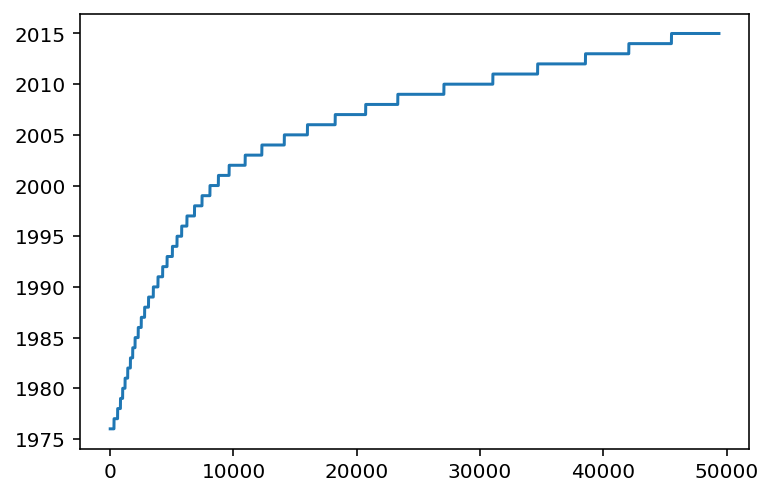

In [36]:
import matplotlib.pyplot as plt
plt.plot(df_50k.Year.values)

In [37]:
df_50k.groupby('year').count()['id'].cumsum()/len(df_50k)

year
1976.0    0.006078
1977.0    0.011936
1978.0    0.016535
1979.0    0.020114
1980.0    0.024012
1981.0    0.028331
1982.0    0.032670
1983.0    0.036408
1984.0    0.040247
1985.0    0.045345
1986.0    0.050284
1987.0    0.055742
1988.0    0.062080
1989.0    0.069838
1990.0    0.077395
1991.0    0.084993
1992.0    0.092151
1993.0    0.100768
1994.0    0.108265
1995.0    0.115823
1996.0    0.124340
1997.0    0.136636
1998.0    0.148832
1999.0    0.161688
2000.0    0.175364
2001.0    0.192798
2002.0    0.218810
2003.0    0.245861
2004.0    0.282270
2005.0    0.319778
2006.0    0.364803
2007.0    0.414227
2008.0    0.466331
2009.0    0.541107
2010.0    0.620481
2011.0    0.693118
2012.0    0.770673
2013.0    0.840991
2014.0    0.910149
2015.0    0.987244
Name: id, dtype: float64

In [38]:
df_50k.at[(df_50k['year']<=2012), 'time_split_years'] =  'train'

In [39]:
df_50k.at[(df_50k['year']==2013), 'time_split_years'] =  'valid'

In [40]:
df_50k.at[(df_50k['year']>2013), 'time_split_years'] =  'test'

In [49]:
df_50k.at[(df_50k['year'].isna()), 'time_split_years'] = 'nan'

In [50]:
df_50k.groupby('time_split_years').count()['id']/len(df_50k)

time_split_years
nan      0.012756
test     0.146253
train    0.770673
valid    0.070317
Name: id, dtype: float64

In [51]:
# gater also 

In [54]:
# all the relevant data is now in here
df_rel = df_50k[['id','class','prod_smiles','reactants_can','split', 'reaction_smarts', 'label', 'time_split','year','time_split_years']]

In [55]:
df_rel = df_rel.sort_index()

In [56]:
df_rel.to_csv('./data/USPTO_50k_MHN_prepro_recre_time.csv.gz')

In [57]:
df_rel

,id,class,prod_smiles,reactants_can,split,reaction_smarts,label,time_split,year,time_split_years
0,US20100317582A1,1,C[C@@H](NC1CCCC(c2ccccn2)C1)c1cccc2ccccc12,C[C@@H](N)c1cccc2ccccc12.O=C1CCCC(c2ccccn2)C1,train,[C:2]-[CH;D3;+0:1](-[C:3])-[NH;D2;+0:5]-[C:4]>...,0,test,2010.0,train
1,US05932582,1,Cc1cc(OCC(N)=O)ccc1NC(=O)OC(C)(C)C,Cc1cc(O)ccc1NC(=O)OC(C)(C)C.NC(=O)CBr,train,[N;D1;H2:3]-[C:2](=[O;D1;H0:4])-[CH2;D2;+0:1]-...,1,valid,1999.0,train
2,US05266570,7,Nc1cnc(NC2CCN(CC34CC(c5ccccc53)c3ccccc34)CC2)nc1N,Nc1nc(NC2CCN(CC34CC(c5ccccc53)c3ccccc34)CC2)nc...,train,[#7;a:4]:[c:3]:[c:2](-[NH2;D1;+0:1]):[c:5]:[#7...,624,valid,1993.0,train
3,US20080181866A1,6,O=C(O)C1CS[C@H](C2CCCNC2)N1C(=O)OCc1ccccc1,CC(C)(C)OC(=O)N1CCCC([C@H]2SCC(C(=O)O)N2C(=O)O...,train,[C:2]-[NH;D2;+0:1]-[C:3]>>C-C(-C)(-C)-O-C(=O)-...,2,test,2008.0,train
4,US07229987B2,7,CN(C)CCCOc1ccc(N)cc1,CN(C)CCCOc1ccc([N+](=O)[O-])cc1,train,[NH2;D1;+0:1]-[c:2]>>O=[N+;H0;D3:1](-[O-])-[c:2],3,test,NaN,nan
...,...,...,...,...,...,...,...,...,...,...
50011,US08232289B2,1,Cc1nn(-c2ncccc2C#N)cc1C=O,Cc1n[nH]cc1C=O.N#Cc1cccnc1F,test,[#7;a:4]:[n;H0;D3;+0:5](:[c:6])-[c;H0;D3;+0:1]...,6102,test,2012.0,train
50012,US04093715,2,Cc1ccc(S(=O)(=O)OC[C@H]2O[C@@H](n3cc(I)c(N)nc3...,Cc1ccc(S(=O)(=O)Cl)cc1.Nc1nc(=O)n([C@H]2C[C@H]...,test,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](=[O;D1;H0:...,65,train,1978.0,train
50013,US20110082164A1,3,Clc1cccc(-c2cncc(Br)c2)c1,Brc1cncc(Br)c1.OB(O)c1cccc(Cl)c1,test,[#7;a:4]:[c:3]:[c;H0;D3;+0:1](:[c:2])-[c;H0;D3...,435,test,2011.0,train
50014,US20110312974A1,1,CCNCc1cc(C(F)(F)F)ccc1-c1c(C)nn(CC(=O)OCC)c1C,CCN.CCOC(=O)Cn1nc(C)c(-c2ccc(C(F)(F)F)cc2C=O)c1C,test,[C:3]-[NH;D2;+0:4]-[CH2;D2;+0:1]-[c:2]>>O=[CH;...,127,test,2011.0,train
